# Binomial Distribution


## Problem Statement 
A bank issues credit cards to customers under the scheme of Master Card. Based on the past data, the bank has found out that 60% of all accounts pay on time following the bill. If a sample of 7 accounts is selected at random from the current database, construct the Binomial Probability Distribution of accounts paying on time.

Work Out Using Python

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


In [2]:
n=7
p=.6
k=np.arange(0,8)

In [3]:
binomial = stats.binom.pmf(k,n,p)
binomial1= stats.binom.cdf(k,n,p)
binomial1

array([0.0016384, 0.0188416, 0.096256 , 0.289792 , 0.580096 , 0.8413696,
       0.9720064, 1.       ])

In [4]:
binomial


array([0.0016384, 0.0172032, 0.0774144, 0.193536 , 0.290304 , 0.2612736,
       0.1306368, 0.0279936])

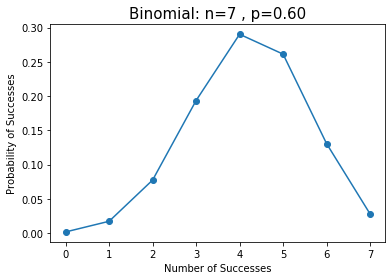

In [5]:
plt.plot(k,binomial,'o-')
plt.title('Binomial: n=%i , p=%.2f' % (n,p), fontsize=15)
plt.xlabel('Number of Successes')
plt.ylabel('Probability of Successes')
plt.show()

In [7]:
#-------------------------------------------------------------------------------------------------------------------------

# Gaussian Distribution

## Problem Statement
the height of humanoids generally follows a normal distribution. Let's suppose that one group of people has an average height of 70 inches and another group has an average height of 73 inches. Heights of individuals in both groups are normally distributed and have a standard distribution of 3 inches, so the difference in mean height between the two groups is equal to one standard deviation.

In each group what is the probability that someone is a giant, which we will define as someone with a height greater than or equal to 79 inches (6'9")?

In [10]:
import numpy as np
import math
import scipy.stats as stats
import scipy.integrate as integrate
import matplotlib.pyplot as plt

In [11]:
mean1 = 70
std = 3
mean2 = mean1 + std

# create list for each group that spans 5 standard deviations below and above the mean with increments of 0.25 inches
height_list1 = np.arange(mean1-std*5, mean1+std*5+0.25, 0.25)
height_list2 = np.arange(mean2-std*5, mean2+std*5+0.25, 0.25)

In [12]:
# set up normal distribution curve for each group for graphing
pdf1 = stats.norm.pdf(height_list1, mean1, std)
pdf2 = stats.norm.pdf(height_list2, mean2, std)

In [13]:
# set up normal probability density function for each group
def pdf1_norm(x):
    y = ((std*math.sqrt(2*math.pi))**(-1))*np.exp(-(x-mean1)**2/(2*std**2))
    return y

def pdf2_norm(x):
    y = (std*math.sqrt(2*math.pi))**(-1)*np.exp(-(x-mean2)**2/(2*std**2))
    return y

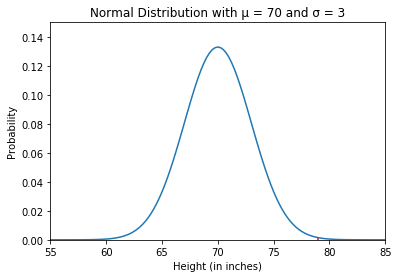

In [14]:
plt.xlim(55, 85)
plt.ylim(0, 0.15)
plt.axvline(mean1+std*3, ymax=pdf1_norm(mean1+std*3)/0.15, color='r')
plt.xticks(np.arange(55, 90, 5))
plt.xlabel('Height (in inches)')
plt.ylabel('Probability')
plt.title('Normal Distribution with μ = 70 and σ = 3')
plt.plot(height_list1, pdf1);

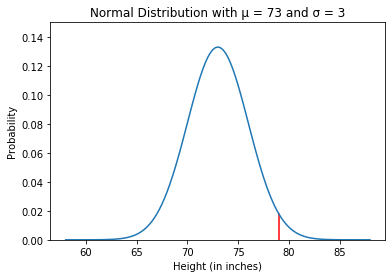

In [15]:
plt.ylim(0, 0.15)
plt.axvline(mean2+std*2, ymax=pdf2_norm(mean2+std*2)/0.15, color='r')
plt.xlabel('Height (in inches)')
plt.ylabel('Probability')
plt.title('Normal Distribution with μ = 73 and σ = 3')
plt.plot(height_list2, pdf2);

 In both graphs we are concerned with the area to the right of the red line. For the group with a mean height of 70, the red line at height 79 is barely visible. In either group the probability of a person being a "giant" is quite low but it is much greater for the second group as we can see in the two graphs.

# Area under Normal Distribution

Next we will calculate the approximate area under each curve to the left of the red line. This value represents the

In [18]:
area1 = integrate.quad(pdf1_norm, mean1+std*3, math.inf)
print('probability of encountering a \'giant\' in the first group =', round(area1[0],5))

probability of encountering a 'giant' in the first group = 0.00135


In [19]:
area2 = integrate.quad(pdf2_norm, mean2+std*2, math.inf)
print('probability of encountering a \'giant\' in the second group =', round(area2[0],5))

probability of encountering a 'giant' in the second group = 0.02275


In [20]:
#---------------------------------------------------------------------------------------------------------------------------

# Poisson Distribution

## Problem Statement
If on an average, 6 customers arrive every one minute at a bank during the busy hours of working, a) what is the probability that exactly four customers arrive in a given minute? b) What is the probability that more than three customers will arrive in a given minute?

Work out using Python

In [21]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [23]:
rate = 6
n=np.arange(0,20)

In [24]:
poisson = stats.poisson.pmf(n,rate)

In [25]:
poisson

array([2.47875218e-03, 1.48725131e-02, 4.46175392e-02, 8.92350784e-02,
       1.33852618e-01, 1.60623141e-01, 1.60623141e-01, 1.37676978e-01,
       1.03257734e-01, 6.88384890e-02, 4.13030934e-02, 2.25289600e-02,
       1.12644800e-02, 5.19899078e-03, 2.22813891e-03, 8.91255562e-04,
       3.34220836e-04, 1.17960295e-04, 3.93200983e-05, 1.24168732e-05])

In [26]:
poisson1 = stats.poisson.cdf(n,rate)
poisson1

array([0.00247875, 0.01735127, 0.0619688 , 0.15120388, 0.2850565 ,
       0.44567964, 0.60630278, 0.74397976, 0.84723749, 0.91607598,
       0.95737908, 0.97990804, 0.99117252, 0.99637151, 0.99859965,
       0.9994909 , 0.99982512, 0.99994308, 0.9999824 , 0.99999482])

In [27]:
poisson1[4]

0.2850565003166312

In [28]:
1-(poisson1[0]+poisson1[2]+poisson1[3])

0.7843485606300269

In [29]:
poisson[4]

0.13385261753998332

In [30]:
1 - (poisson[0]+poisson[1]+poisson[2]+poisson[3])

0.8487961172233521

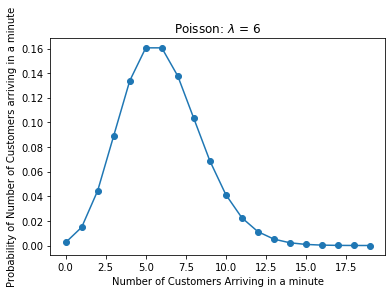

In [31]:
plt.plot(n,poisson,'o-')
plt.title('Poisson: $\lambda$ = %i ' % rate)
plt.xlabel('Number of Customers Arriving in a minute')
plt.ylabel('Probability of Number of Customers arriving in a minute')
plt.show()

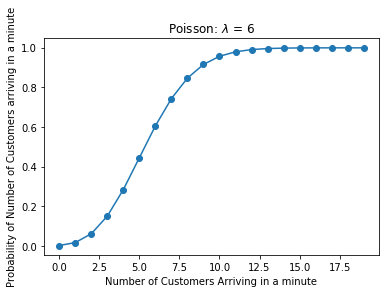

In [32]:
plt.plot(n,poisson1,'o-')
plt.title('Poisson: $\lambda$ = %i ' % rate)
plt.xlabel('Number of Customers Arriving in a minute')
plt.ylabel('Probability of Number of Customers arriving in a minute')
plt.show()

In [33]:
#---------------------------------------------------------------------------------------------------------------------------

# Central Limit Theorem

## Problem Statement 
we will verify whether the Central Limit Theorem is correct or not for our data set. Generate 5 million random numbers in [1, 10] using “np.randint”. Using np.choice() method, draw 100,000 samples, each of size 50, without replacement. Plot the histogram for your original population and calculate µ and σ. For each sample, calculate 𝑥̅. You will have 100,000 values. Plot the histogram for these values and calculate the mean and standard deviation for them. Is the mean equal to µ? Is the standard deviation equal to σ/sqrt(50)? In your plots, replace the ‘??’ with your calculations.

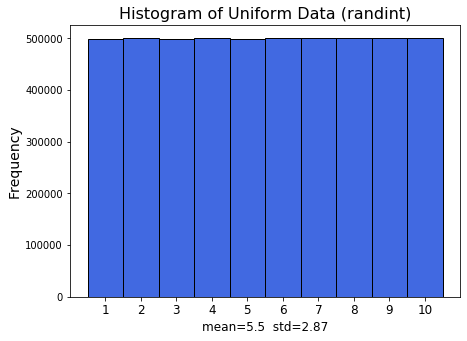

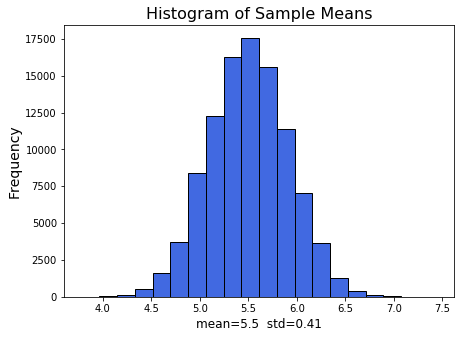


Conclusion: 
* The Mean µ of the original data is equal to the mean of samples mean, µ = samples_mean =  5.5
* The standard deviation of the samples equal to σ/sqrt(50),  samples_std = σ/sqrt(50) =  0.41


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as st
import sys

#npdata = np.random.choice(range(1,11),size=(50,100000))
original = np.random.choice(range(1,11),size = 5000000 )
npdata = np.reshape(original,(50,100000))

# array of means (mean foe every sample/column)
samples_mean_arr = npdata.mean(axis=0)
#print(samples_mean_arr)

# total mean and std for the data set
µ = npdata.mean().round(2)
σ = npdata.std().round(2)
#print ( µ, σ)

# mean and std for the mean array 
samples_mean = samples_mean_arr.mean().round(2)
samples_std = samples_mean_arr.std().round(2)

ind = np.arange(1,11,1)
bins = np.arange(1,12) - 0.5
fig1 = plt.figure(figsize=(7,5))
plt.hist(original, color='royalblue', bins=bins, edgecolor='black', width = 1, align='mid')
plt.xticks(ind, fontsize=12)
plt.xlabel('mean=' + str(µ) + '  std=' + str(σ) , fontsize=12)
plt.ylabel('Frequency',fontsize=14)
plt.title("Histogram of Uniform Data (randint)", fontsize=16)

fig2 = plt.figure(figsize=(7,5))
freq_arr, bins, bars= plt.hist(samples_mean_arr, color='royalblue', bins=20, edgecolor='black')

plt.xlabel('mean=' + str(samples_mean) + '  std=' + str(samples_std) , fontsize=12)
plt.ylabel('Frequency',fontsize=14)
plt.title("Histogram of Sample Means", fontsize=16)
plt.show()  

print("\nConclusion: ")
print("* The Mean µ of the original data is equal to the mean of samples mean, µ = samples_mean = ", samples_mean)
print("* The standard deviation of the samples equal to σ/sqrt(50),  samples_std = σ/sqrt(50) = ", (σ/math.sqrt(50)).round(2))

In [35]:
#--------------------------------------------------------------------------------------------------------------------------------------------------------

# Z Score

## Problem Statement 
Calculating the Z score of Rain precipitation for a period of six months..


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [41]:
data = pd.read_csv('../desktop/prcphq.046037.month.txt', sep=r"\s+",                    
                   skiprows=1, usecols=[1, 2], 
                   parse_dates=True,
                   index_col = 0,
                   names=['Date', 'Rain'])

In [42]:
data['Rain_6'] = data['Rain'].rolling(6).sum()
df_6mon = data[['Rain_6']].dropna()

In [43]:
df_6mon['ZSI'] = np.nan

for imon in np.arange(1, 13):
    sinds = df_6mon.index.month==imon    
    x = df_6mon[sinds]       
    y = (x -x.mean())/x.std()   
    df_6mon.loc[sinds, 'ZSI'] = y.values[:,0]   

In [44]:
data['ZSI'] = df_6mon['ZSI']
del df_6mon
data.head(7)

,Rain,Rain_6,ZSI
Date,,,
1892-01-31,2.5,NaN,NaN
1892-02-29,12.2,NaN,NaN
1892-03-31,1.8,NaN,NaN
1892-04-30,1.5,NaN,NaN
1892-05-31,16.8,NaN,NaN
1892-06-30,1.0,35.8,-0.915872
1892-07-31,11.7,45.0,-0.806282


(-3, 3)

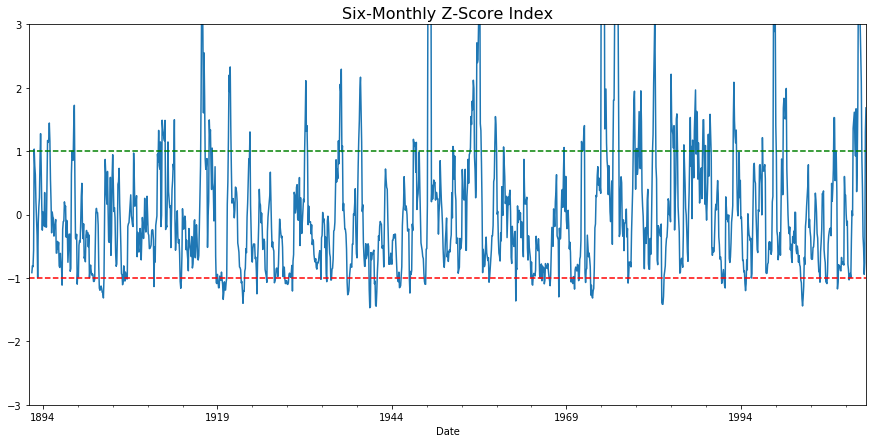

In [45]:
ax = data['ZSI'].plot(figsize=(15, 7), )
ax.axhline(1,  linestyle='--', color='g')
ax.axhline(-1, linestyle='--', color='r')
ax.set_title('Six-Monthly Z-Score Index', fontsize=16)
ax.set_xlim(data.index.min(), data.index.max())
ax.set_ylim(-3, 3)